In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-linear-regression-placement-data/placement.csv


In [152]:
import seaborn as sns

In [83]:
df=pd.read_csv('../input/simple-linear-regression-placement-data/placement.csv')

In [84]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


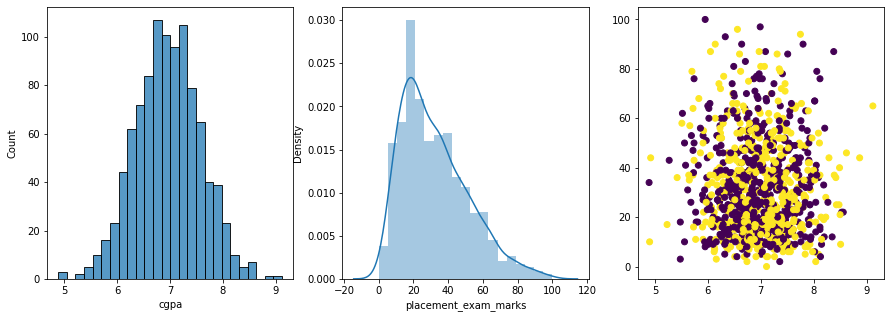

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.histplot(df['cgpa'])

plt.subplot(1,3,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,3,3)
plt.scatter(df['cgpa'],df['placement_exam_marks'],c=df['placed'])
plt.show()

In [86]:
x=df.iloc[:,:2]
y=df.iloc[:,2:]

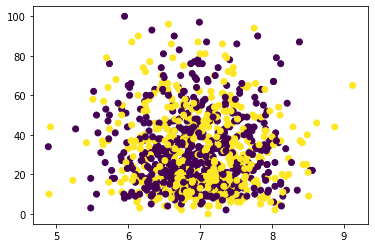

In [87]:
import matplotlib.pyplot as plt
plt.scatter(x['cgpa'],x['placement_exam_marks'],c=y['placed'])

In [128]:
from sklearn.model_selection import train_test_split
test_x,train_x,test_y,train_y=train_test_split(x,y,train_size=0.1)

In [129]:
train_x

,cgpa,placement_exam_marks
702,6.24,39.0
167,6.65,48.0
488,6.75,43.0
236,7.70,36.0
93,7.00,30.0
...,...,...
971,6.69,18.0
980,6.18,27.0
847,7.20,54.0
818,5.52,62.0


In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()


In [132]:
train_x=scaler.fit_transform(train_x)

In [133]:
train_x

array([[-1.1604399 ,  0.35583468],
       [-0.50067237,  0.82297584],
       [-0.33975346,  0.56345297],
       ...,
       [ 0.38438164,  1.13440328],
       [-2.31905605,  1.54963986],
       [ 0.88323026, -0.31892476]])

In [134]:
test_x=scaler.transform(test_x)

In [135]:
#plt.scatter(train_x['cgpa'],train_x['placement_exam_marks'],c=train_y['placed'])

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
clf=LogisticRegression()

In [140]:
train_y.shape

(900, 1)

In [142]:
clf.fit(train_x,train_y.values.ravel())

LogisticRegression()

In [143]:
pre_y=clf.predict(test_x)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pre_y)

0.48

In [145]:
from mlxtend.plotting import plot_decision_regions

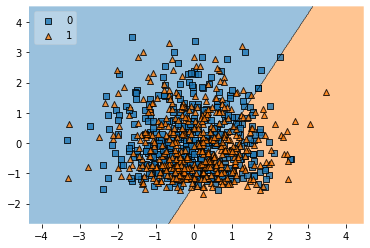

In [147]:
fig = plot_decision_regions(X=train_x, y=train_y.values.ravel(),
                                clf=clf, legend=2)

In [149]:
#making binary file of my library
import pickle
pickle.dump(clf,open('model_placement','wb'))

In [159]:
# how to use this binary model file
pickle_model=pickle.load(open('./model_placement', 'rb'))

In [162]:
pickle_model.predict(test_x)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])